In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
deliveries = pd.read_csv('Ipl Data/deliveries.csv')

In [6]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


In [7]:
#find out top bowlers - counting most number of wickets
bowlers = deliveries[deliveries['dismissal_kind'] != 'run out']
bowlers = deliveries.groupby('bowler').apply(lambda x: x['dismissal_kind'].dropna().reset_index(name='wickets'))
bowlers

index            wickets
bowler                                       
A Ashish Reddy 0     80497             bowled
               1     80502             caught
               2     81750             caught
               3     82253             caught
               4     83084             caught
               5     84197                lbw
               6     84719                lbw
               7     84767             bowled
               8     88987             caught
               9     89007             caught
               10    89009             caught
               11    90942             bowled
               12    91741  caught and bowled
               13    93935             bowled
               14   124540             bowled
               15   126002             caught
               16   130633            run out
               17   130634             bowled
               18   138154                lbw
A Chandila     0     86229             caught
               1     86230            stumped
               2     86238            stumped
               3     86254  caught and bowled
               4     88247  caught and bowled
               5     95455             caught
               6     95468  caught and bowled
               7     97117  caught and bowled
               8     98443             caught
               9     98466             caught
               10   103230  caught and bowled
...                    ...                ...
Z Khan         89   107156             caught
               90   107157             caught
               91   107195             caught
               92   107197  caught and bowled
               93   108522             caught
               94   109521             caught
               95   109523                lbw
               96   112939             caught
               97   112953             caught
               98   113395            run out
               99   129240             caught
               100  129335            run out
               101  129840             caught
               102  129856             caught
               103  131790                lbw
               104  132878             caught
               105  133878             caught
               106  133951             caught
               107  137849             caught
               108  138681             caught
               109  140299            run out
               110  140339             caught
               111  142381             caught
               112  142391                lbw
               113  142479            run out
               114  142480             caught
               115  143476             bowled
               116  144752             caught
               117  147288             caught
               118  149389             caught

[8834 rows x 2 columns]

In [8]:
bowlers_df = bowlers.groupby('bowler').count().reset_index()
top_bowlers = bowlers_df.sort_values(by='wickets', ascending=False)[:10]

In [9]:
top_bowlers

,bowler,index,wickets
294,SL Malinga,188,188
84,DJ Bravo,168,168
6,A Mishra,165,165
113,Harbhajan Singh,161,161
231,PP Chawla,156,156
48,B Kumar,141,141
236,R Ashwin,138,138
300,SP Narine,137,137
330,UT Yadav,136,136
247,R Vinay Kumar,127,127


In [10]:
bowlers_df

,bowler,index,wickets
0,A Ashish Reddy,19,19
1,A Chandila,11,11
2,A Choudhary,5,5
3,A Flintoff,2,2
4,A Joseph,6,6
5,A Kumble,49,49
6,A Mishra,165,165
7,A Mithun,8,8
8,A Nehra,121,121
9,A Nel,1,1


Top 10 wicket tackers in the History of IPL


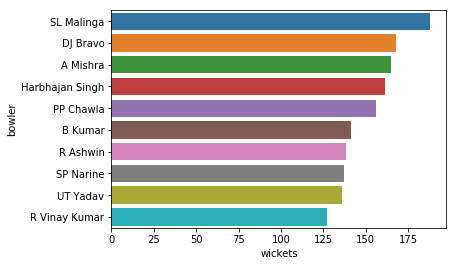

In [11]:
print("Top 10 wicket tackers in the History of IPL")
sns.barplot(top_bowlers['wickets'],top_bowlers['bowler'])

In [12]:
matches_dataset=pd.read_csv("Ipl Data/matches.csv")

In [13]:
matches_dataset['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
# Highest team score in each season

deliveries=deliveries.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
deliveries=deliveries.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
deliveries=deliveries.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad")

matches = []
total_innings = []
batting_team = []
runs = []

for match_no in deliveries['match_id'].unique():
    for innings in deliveries[ deliveries['match_id']==match_no ]['inning'].unique():
        df = deliveries[
                        (deliveries['match_id']==match_no) &
                        (deliveries['inning']==innings)
        ]
        total_runs = df['total_runs'].sum()
        runs.append(total_runs)
        matches.append(match_no)
        total_innings.append(innings)
        batting_team.append(df['batting_team'].unique()[0])

In [15]:
#Final Dataset after preprocessing
df1 = pd.DataFrame()
df1['match_id'] = matches
df1['total_runs'] = runs
df1['season'] = [matches_dataset[ matches_dataset['id']==i ]['season'].unique()[0] for i in matches] 
df1['batting_team'] = batting_team


df1

,match_id,total_runs,season,batting_team
0,1,207,2017,Sunrisers Hyderabad
1,1,172,2017,Royal Challengers Bangalore
2,2,184,2017,Mumbai Indians
3,2,187,2017,Rising Pune Supergiants
4,3,183,2017,Gujarat Lions
5,3,184,2017,Kolkata Knight Riders
6,4,163,2017,Rising Pune Supergiants
7,4,164,2017,Kings XI Punjab
8,5,157,2017,Royal Challengers Bangalore
9,5,142,2017,Delhi Capitals


In [16]:
#Maximum score in each season

season = []
teamId = []
max_runs = []
for year in df1['season'].unique():
    maximum_run = df1[ df1['season']==year ]['total_runs'].max()
    team = df1[ (df1['season']==year) & (df1['total_runs']==maximum_run) ]['batting_team'].unique()[0]
    season.append(year)
    teamId.append(team)
    max_runs.append(maximum_run)

max_runs

[230, 240, 211, 246, 232, 222, 263, 231, 235, 248, 250, 241]

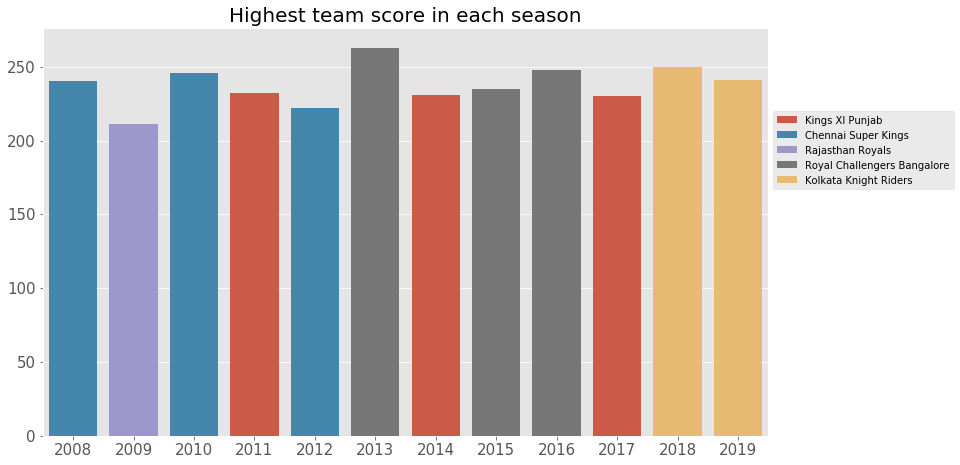

In [17]:
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(13,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Highest team score in each season",fontsize=20)
ax=sns.barplot(x = season, y = max_runs, hue = teamId, dodge=False)
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.7))


Batsman's name = DA Warner
Number of Innings Played by DA Warner = 126
DA Warner's Average = 44.13084112149533
DA Warner's Strike rate = 124.66752738981302

Batsman's name = V Kohli
Number of Innings Played by V Kohli = 169
V Kohli's Average = 38.17605633802817
V Kohli's Strike rate = 118.77360039163217

Batsman's name = R Sharma
Number of Innings Played by R Sharma = 194
R Sharma's Average = 30.857142857142858
R Sharma's Strike rate = 107.60903844751408

Batsman's name = AD Russell
Number of Innings Played by AD Russell = 52
AD Russell's Average = 35.375
AD Russell's Strike rate = 159.662336523159

Batsman's name = HH Pandya
Number of Innings Played by HH Pandya = 61
HH Pandya's Average = 29.35135135135135
HH Pandya's Strike rate = 148.34440699460256

Batsman's name = RR Pant
Number of Innings Played by RR Pant = 54
RR Pant's Average = 37.59574468085106
RR Pant's Strike rate = 137.12944646508535



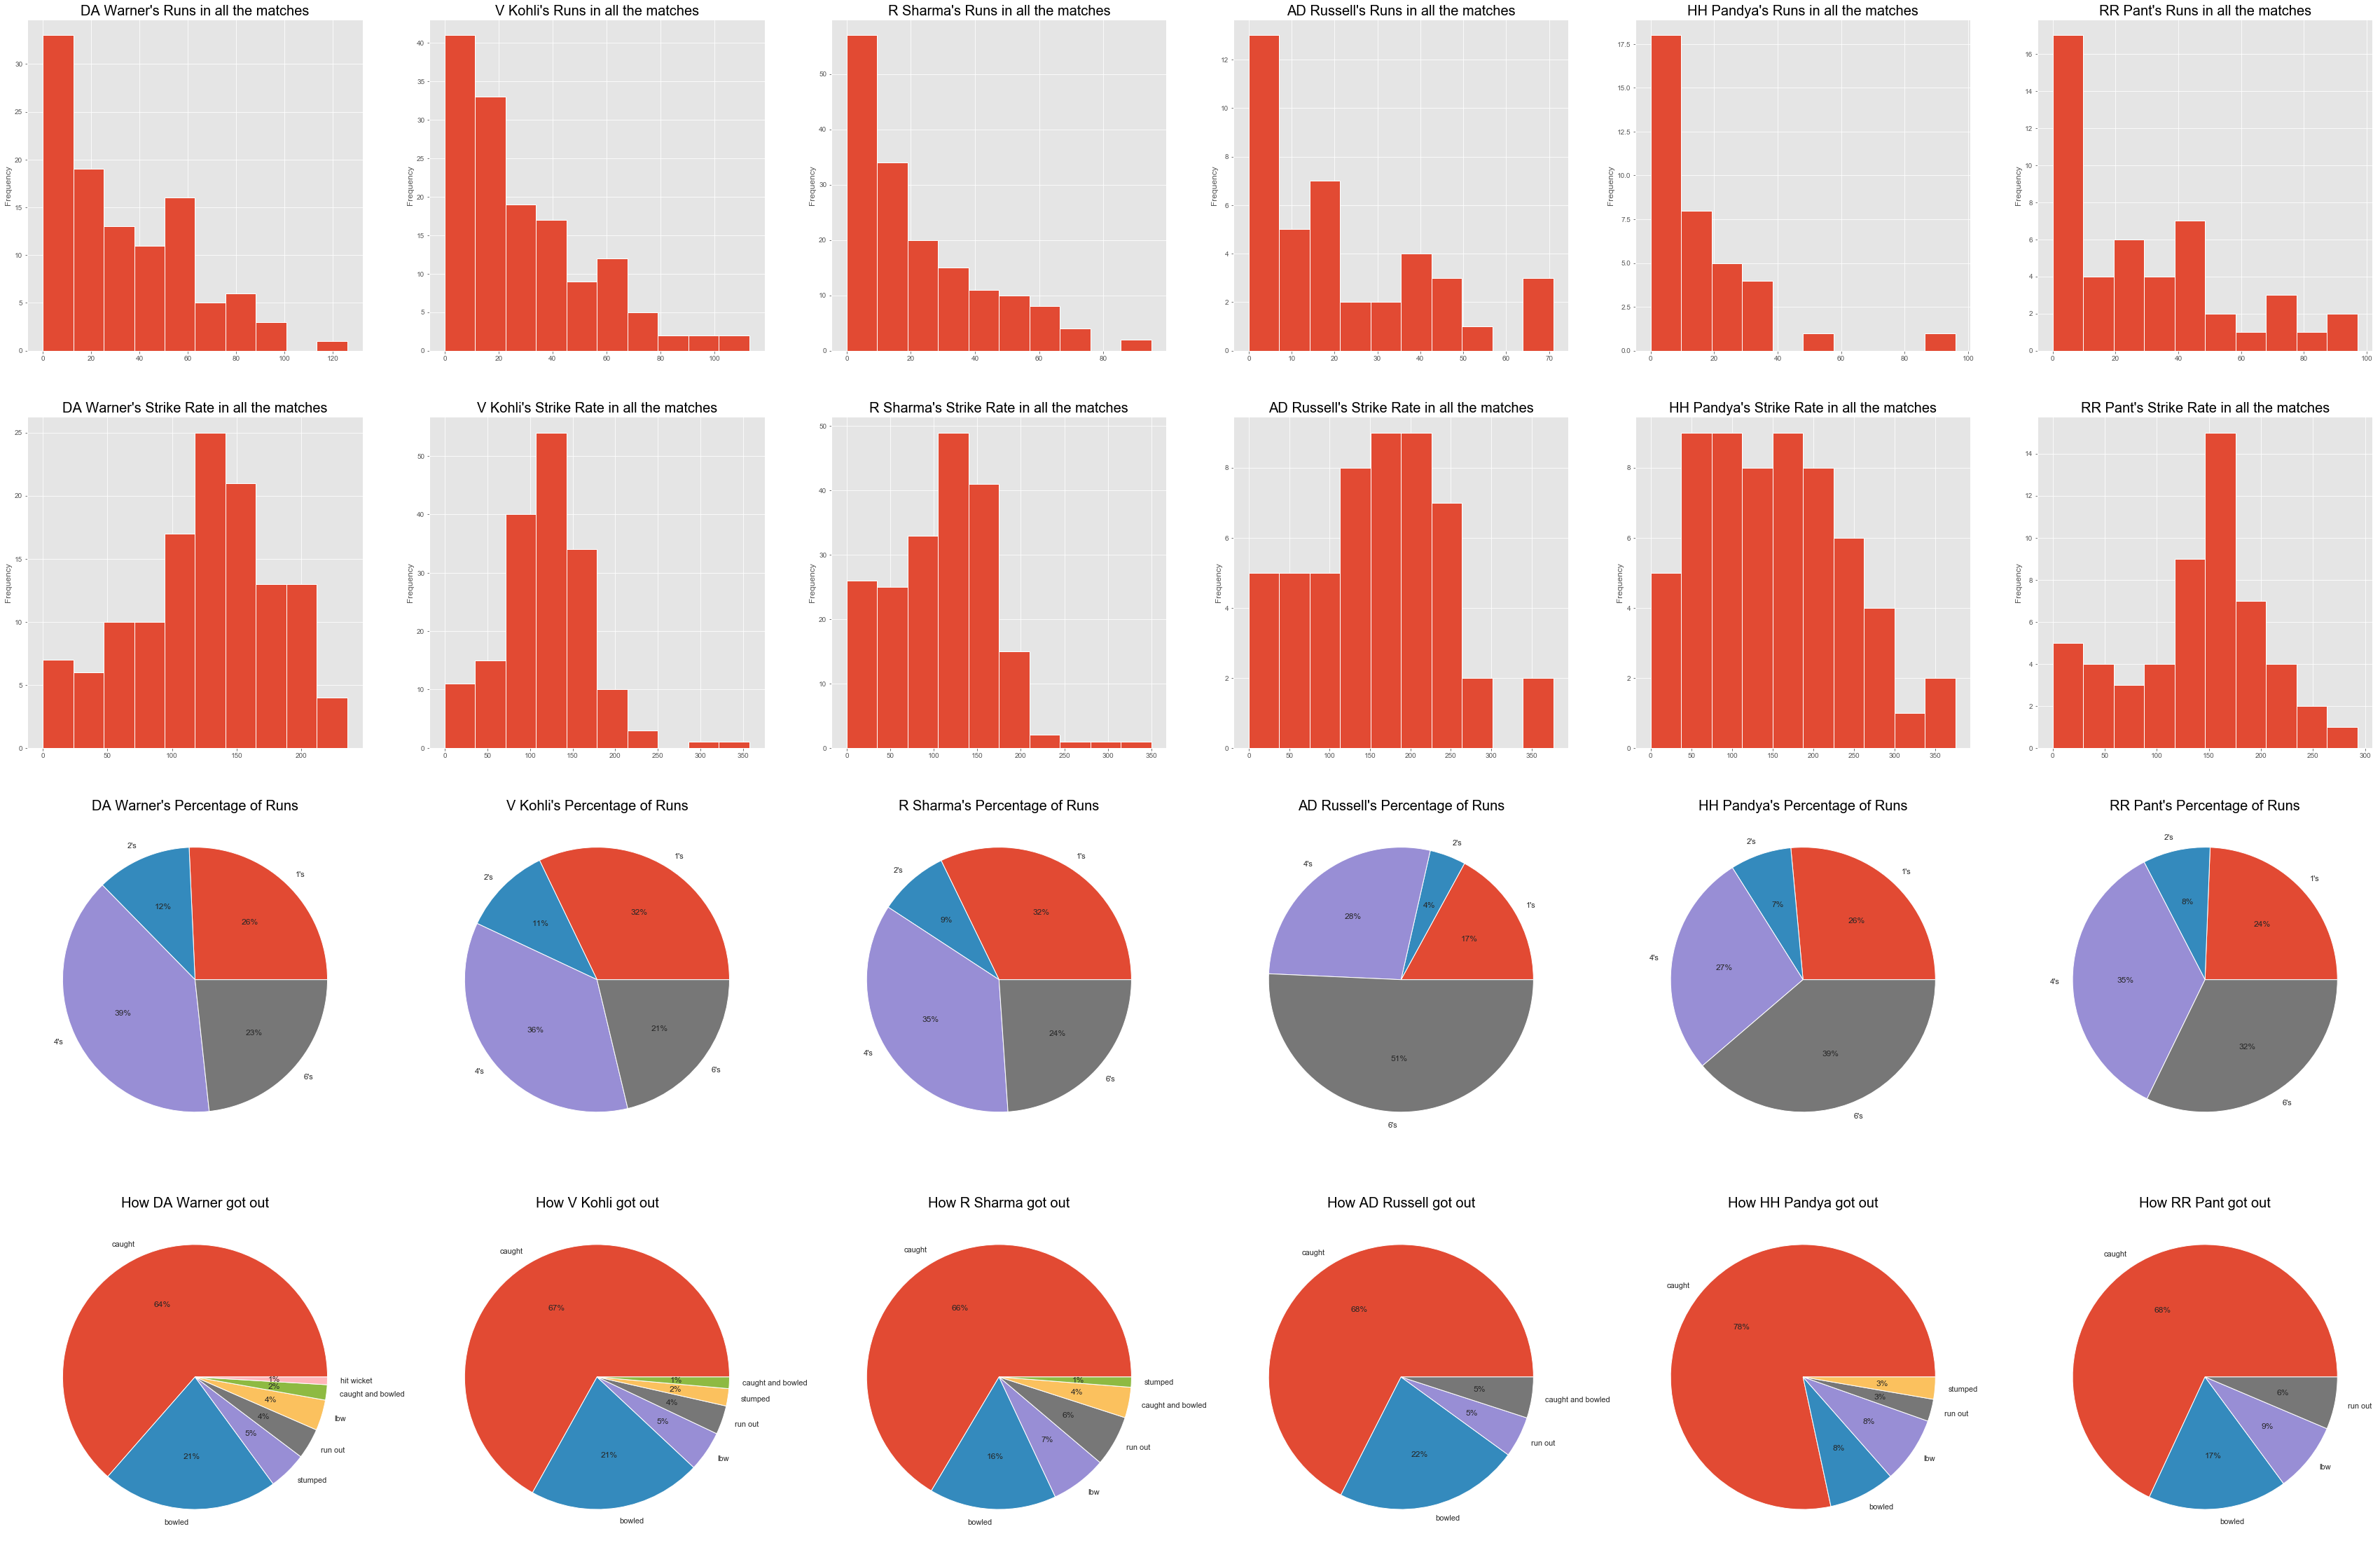

In [18]:
deliveries=deliveries.replace(to_replace='RG Sharma', value='R Sharma')
def Batsmen(bat_name, fig, axes, pos):
    data = []
    for match in deliveries['match_id'].unique():
        df_tmp = deliveries[
                (deliveries['batsman']==bat_name) &
                (deliveries['match_id']==match) &
                (deliveries['is_super_over']==0) &
                (deliveries['wide_runs']==0)
        ]
        if df_tmp.shape[0]==0: continue

        out = 0
        if bat_name in df_tmp['player_dismissed'].unique(): out=1
        how_out = None
        if out: how_out = df_tmp[ df_tmp['player_dismissed']==bat_name ]['dismissal_kind'].unique()[0]

        row = []
        row.append(match)
        row.append(df_tmp['batsman_runs'].sum())
        row.append(df_tmp.shape[0])
        #print(row)
        dic = dict(df_tmp['batsman_runs'].value_counts())
        runs = 0
        for i in range(7):
            if i in dic.keys(): 
                row.append(dic[i])
                runs += i*dic[i]
            else: row.append(0)
        row.append(out)
        row.append(how_out)

        data.append(row)
        #assert(row[2]==sum(row[3:10]))
        #assert(row[1]==runs)

    #print(data)
    df_bat = pd.DataFrame(data, columns=['match_id', 'total_runs', 'total_balls', '0', '1', '2', '3', '4', '5', '6', 'out', 'how_out'])
    df_bat.head(10)
    print("Number of Innings Played by "+bat_name+" = "+str(df_bat.shape[0]))
    if df_bat['out'].sum()!=0: print(bat_name+'\'s Average = '+str(df_bat['total_runs'].sum()/df_bat['out'].sum()))
    
    sns.set()
    sns.set_palette(sns.color_palette('tab10'))
    df_bat[ df_bat['out']==1 ]['total_runs'].plot(kind='hist', ax = axes[0, pos])
    axes[0,pos].set_title(bat_name+'\'s Runs in all the matches', fontsize=20)
    #plt.show()
    
    st = df_bat['total_runs']/df_bat['total_balls']*100
    print(bat_name+'\'s Strike rate = '+str(np.average(st)))
    st.plot(kind='hist', ax = axes[1, pos])
    axes[1,pos].set_title(bat_name+'\'s Strike Rate in all the matches', fontsize=20)
    #plt.show()
    
    runs = []
    for i in [1,2,4,6]:
        runs.append(i*df_bat[str(i)].sum())
    axes[2,pos].pie(runs, labels = ['1\'s','2\'s','4\'s','6\'s'], autopct = "%1.0f%%")
    axes[2,pos].set_title(bat_name+'\'s Percentage of Runs', fontsize=20)
    #plt.show()
    
    axes[3,pos].pie(df_bat['how_out'].value_counts().values, labels = df_bat['how_out'].value_counts().index, autopct = '%1.0f%%')
    axes[3,pos].set_title('How '+bat_name+' got out', fontsize=20)
    #plt.show()
    
name = ['DA Warner', 'V Kohli', 'R Sharma', 'AD Russell', 'HH Pandya', 'RR Pant']
pos = 0
fig, axes = plt.subplots(4,len(name), figsize = (60,40))
for i in name:
    print('Batsman\'s name = '+i)
    Batsmen(i, fig, axes, pos)
    pos +=1
    print()
plt.show()
#fig.savefig('Batsmen.png')

In [19]:
batsmen = deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name="runs")
top_batsmen = batsmen.sort_values(by='runs', ascending=False)
top_batsmen[top_batsmen.runs>=1000]

,batsman,runs
485,V Kohli,5434
427,SK Raina,5415
356,R Sharma,4980
112,DA Warner,4741
391,S Dhawan,4632
92,CH Gayle,4560
290,MS Dhoni,4477
383,RV Uthappa,4446
26,AB de Villiers,4428
147,G Gambhir,4223


In [23]:
top_batsmen.rename(columns = {'batsman': 'player'}, inplace = True)

In [21]:
best_bowlers = bowlers_df.sort_values(by='wickets', ascending=False)
best_bowlers[best_bowlers.wickets>=40]
best_bowlers.rename(columns = {'bowler': 'player'}, inplace = True)

In [25]:
#score=runs+25*wickets
all_rounders=pd.merge(top_batsmen, best_bowlers, how='inner')
all_rounders['score']=all_rounders['runs']+25*all_rounders['wickets']
all_rounders = all_rounders.sort_values(by='score', ascending=False)[:5]
all_rounders

,player,runs,index,wickets,score
6,SR Watson,3614,107,107,6289
1,SK Raina,5415,30,30,6165
2,R Sharma,4980,42,42,6030
18,DJ Bravo,1498,168,168,5698
0,V Kohli,5434,5,5,5559


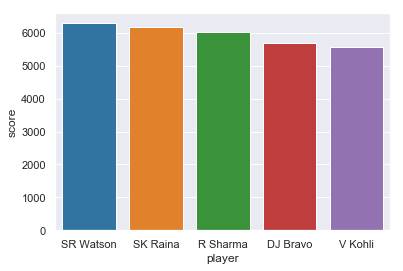

In [27]:
sns.barplot(all_rounders['player'],all_rounders['score'])